* Author: Felix Cahyadi
* Date Created: 11.10.2023

In [19]:
# Import libraries
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [20]:
# Extract the data from the csv file
df = pd.read_csv('TCAD_1_data.csv')
# Preview data
df.head()

,Pot (V),Itot (A/cm)
0,0.0,3.136532e-10
1,0.1,6.981063e-10
2,0.2,2.057703e-09
3,0.3,7.076360e-09
4,0.4,2.572480e-08


In [21]:
# Extract the voltages and the currents
# cutoff

cutoff_idx =  50 # default: 101
V_all = np.array(df['Pot (V)'])
I_all = np.array(df['Itot (A/cm)'])
V_arr = V_all[:cutoff_idx]
I_arr = I_all[:cutoff_idx]

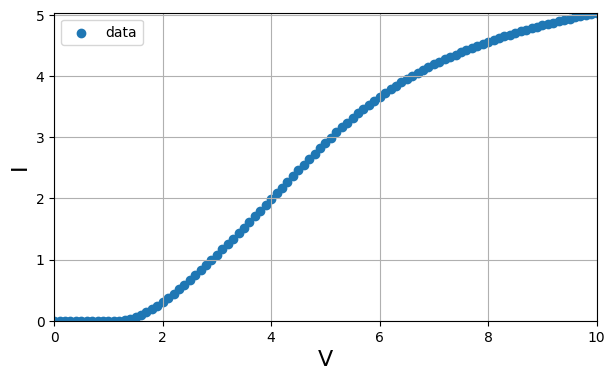

In [22]:
fig_before, ax_before = plt.subplots(figsize = (7,4))
ax_before.scatter(V_all,I_all, label = 'data')
ax_before.set_xlim((np.min(V_all),np.max(V_all)))
ax_before.set_ylim((np.min(I_all),np.max(I_all)))
ax_before.grid()
ax_before.set_xlabel('V', fontsize = 16)
ax_before.set_ylabel('I', fontsize = 16)
ax_before.legend()

In [23]:
# Make a function that calculates the error of the fitting

def trans_char(params, *args, ret_I = False):
    V_arr = args[0]
    I_arr = args[1]
    K = params[1]
    Vt = params[0]

    deltaV = V_arr - Vt
    deltaV[deltaV<0] = 0

 
    I_theory = K*np.square(deltaV)
    
    I_rel_diff = (I_theory - I_arr)/I_arr
    rms_err = np.sqrt(np.sum(np.square(I_rel_diff))) # Relative error
    #rms_err = np.sqrt(mean_squared_error(I_theory,I_arr)) # Absolute error

    if ret_I:
        return rms_err, I_theory, np.abs(I_rel_diff)
    else:
        return rms_err

In [24]:
# Optimize the function
x_guess = np.array([1,.1])
solution = minimize(trans_char,x0 = x_guess,args = (V_arr,I_arr), bounds=([0,3],[0,10]))


In [25]:
solution

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 3.6135609214240043
        x: [ 1.062e+00  2.446e-01]
      nit: 7
      jac: [-4.308e-06  9.770e-07]
     nfev: 33
     njev: 11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [26]:
fit_params = solution['x']
print(f"This is the voltage: {fit_params[0]} V")
print(f"And the K: {fit_params[1]}")

This is the voltage: 1.0619489068948038 V
And the K: 0.2446441557613939


In [27]:
err, fit_I, rel_errs = trans_char(fit_params,V_all,I_all, ret_I=True)

In [53]:
err_perc = rel_errs.copy()*100
print(err_perc[42])
print(V_all[V_all>fit_params[0]])
print(V_all)

10.676904271679385
[ 1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4
  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8
  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2
  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6
  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.
  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4
  9.5  9.6  9.7  9.8  9.9 10. ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


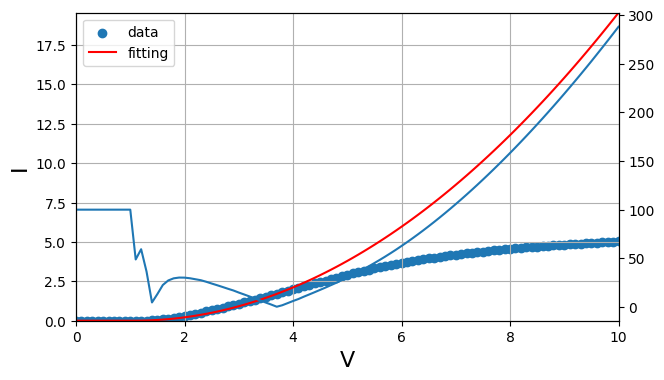

In [51]:
fig_after, ax_after = plt.subplots(figsize = (7,4))
ax_after.scatter(V_all,I_all, label = 'data')
ax_after.plot(V_all, fit_I, label = 'fitting', color = 'red')
ax_after2 = ax_after.twinx()
ax_after2.plot(V_all, err_perc, label = '|Relative error|')

# Just the fitted data
#ax_after.set_xlim((np.min(V_arr),np.max(V_arr)))
#ax_after.set_ylim((np.min(I_arr),np.max([np.max(I_arr),np.max(fit_I[:len(I_arr)])])))

# All data
ax_after.set_xlim((np.min(V_all),np.max(V_all)))
ax_after.set_ylim((np.min(I_all),np.max([np.max(I_all),np.max(fit_I)])))

ax_after.grid()
ax_after.set_xlabel('V', fontsize = 16)
ax_after.set_ylabel('I', fontsize = 16)
ax_after.legend()
#ax_after2.legend()

The second method: We'll fix the V_t first, and then we will fit the others

In [30]:
# Acquire Vt
min_sample_id = 25
max_sample_id = 45
min_sample_V = V_all[min_sample_id]
max_sample_V = V_all[max_sample_id]
min_sample_I = I_all[min_sample_id]
max_sample_I = I_all[max_sample_id]
grad = (max_sample_I-min_sample_I)/(max_sample_V-min_sample_V)
Vt_grad = min_sample_V - (min_sample_I/grad)

In [31]:
print(Vt_grad)

1.7549719235551353


In [32]:
# Fit only the value of k
def trans_char_grad(K, *args, ret_I = False):
    Vt = args[0]
    V_arr = args[1]
    I_arr = args[2]
    

    deltaV = V_arr - Vt
    deltaV[deltaV<0] = 0

 
    I_theory = K*np.square(deltaV)
    
    I_rel_diff = (I_theory - I_arr)/I_arr
    rms_err = np.sqrt(np.sum(np.square(I_rel_diff))) # Relative error
    #rms_err = np.sqrt(mean_squared_error(I_theory,I_arr)) # Absolute error

    if ret_I:
        return rms_err, I_theory, np.abs(I_rel_diff)
    else:
        return rms_err

In [33]:
#Optimize the function
sol_grad = minimize(trans_char_grad, x0 = [1.0], args = (Vt_grad,V_arr,I_arr))

In [34]:
sol_grad

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.115490980927513
        x: [ 4.163e-01]
      nit: 6
      jac: [ 0.000e+00]
 hess_inv: [[ 3.720e-02]]
     nfev: 14
     njev: 7

In [35]:
err_grad, fit_I_grad, rel_errs_grad = trans_char_grad(sol_grad.x,Vt_grad, V_all,I_all,ret_I=True)

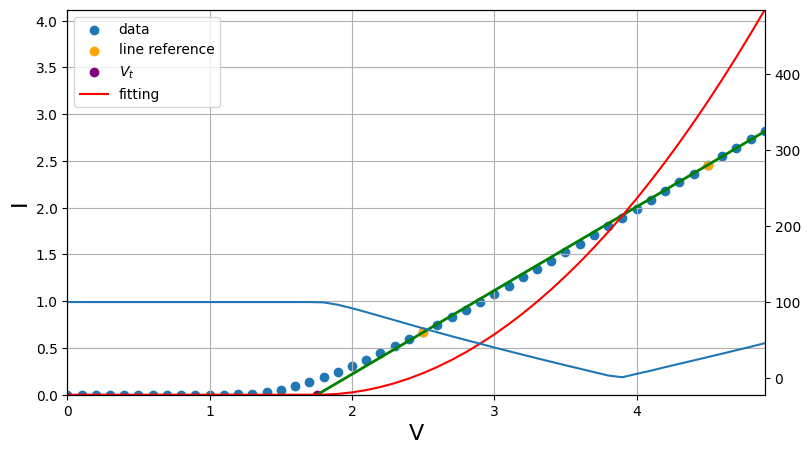

In [36]:
# Plot the data
fig_vt, ax_vt = plt.subplots(figsize = (9,5))

ax_vt.scatter(V_all, I_all, label = 'data')
ax_vt.axline((min_sample_V,min_sample_I), slope=grad, linewidth = 2, color = 'green')
ax_vt.scatter([min_sample_V,max_sample_V],[min_sample_I,max_sample_I], color = 'orange', label = 'line reference')
ax_vt.scatter(Vt_grad,0, color = 'purple', label = '$V_t$')
ax_vt.plot(V_all, fit_I_grad, label = 'fitting', color = 'red')
ax_vt2 = ax_vt.twinx()
ax_vt2.plot(V_all, rel_errs_grad*100, label = '|Relative error|')

# Just the fitted data
ax_vt.set_xlim((np.min(V_arr),np.max(V_arr)))
ax_vt.set_ylim((np.min(I_arr),np.max([np.max(I_arr),np.max(fit_I_grad[:len(I_arr)])])))


ax_vt.grid()
ax_vt.set_xlabel('V', fontsize = 16)
ax_vt.set_ylabel('I', fontsize = 16)
ax_vt.legend()

